In [1]:
import docx
import os

Loading the data: getting full text from all the .docx interview files

In [2]:
#function to get all text from a file 
def getText(filename):
    doc = docx.Document(filename)
    fullText = ""
    for para in doc.paragraphs: 
        fullText = fullText + para.text + " "
    return fullText

In [3]:
#change working directory
interview_folder = "C:\\Users\\605665\\Documents\\Student2Student\\Interview Notes"
os.chdir(interview_folder)
os.getcwd()

'C:\\Users\\605665\\Documents\\Student2Student\\Interview Notes'

In [4]:
allText = [] #list for all the interview text 
# function to loop through all the interview notes documents 
for filename in os.listdir(interview_folder):
    if '.docx' in filename:
        allText.append(getText(filename))

In [5]:
len(allText)

38

Pre-processing:
- Tokenization: split text, lowercase, remove puncutation 
- removing words with fewer than 3 characters
- removing stopwords 
- lemmatized: grouping different inflections of words together 
- stemmed: words reduced to root form 

In [6]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\605665\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
#lemmatize example
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


In [8]:
#create a new instance of an english stemmer
stemmer = SnowballStemmer('english')

In [9]:
# lemmatization and stemming
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [10]:
#testing preprocessing on a doc 
doc_sample = allText[0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['As', 'a', 'family,', 'we', 'moved', 'from', 'Omaha', 'to', 'Ft.', 'Meade', '(2004),', 'Ft.', 'Meade', 'to', 'Ft.', 'Bragg', '(2007),', 'and', 'Ft.', 'Bragg', 'to', 'Joint', 'Base', 'San', 'Antonio', 'Randolph', '(2012)', '', '', 'Our', 'first', 'family', 'move,', 'my', 'kids', 'were', '2', 'yrs', 'old', 'and', '2', 'months', 'old;', 'respectively.', '', 'My', 'wife', 'and', 'I', 'were', '28.', '', '', '', 'For', 'the', 'first', 'move,', 'we', 'really', 'relied', 'on', 'sponsor', 'packages', 'and', 'any', 'material', 'we', 'could', 'find;', 'internet,', 'family', 'support', 'center,', 'etc.', '', 'We', 'purposely', 'stayed', 'on', 'base', 'because', 'we', 'had', 'no', 'idea', 'what', 'to', 'expect.', '', 'For', 'subsequent', 'moves,', 'the', 'internet', 'was', 'helpful,', 'but', 'we', 'also', 'relied', 'very', 'heavily', 'on', 'our', 'friend', 'networks', 'to', 'get', 'ground', 'truth', 'on', 'school', 'districts,', 'doctors,', 'neighborhoods,', 'commute', 'times,'

Bag of Words: create a dictionary for the number of times a word appears

In [12]:
processed_docs = [preprocess(doc) for doc in allText]

In [13]:
len(processed_docs)

38

In [14]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [15]:
count = 0 
for k, v in dictionary.iteritems():
    print(k,v)
    count += 1
    if count > 10: 
        break 

0 absolut
1 actic
2 adapt
3 antonio
4 anxious
5 band
6 base
7 basketbal
8 best
9 bona
10 bragg


In [16]:
#gensim filter_extremes
#filter parameters:
no_below = 5  #absolute number
no_above = 0.4 # fraction of total corpus size 
dictionary.filter_extremes(no_below, no_above, keep_n=100000)

In [17]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[23]

[(1, 1),
 (15, 2),
 (16, 1),
 (20, 1),
 (22, 2),
 (28, 2),
 (30, 1),
 (33, 1),
 (35, 1),
 (39, 2),
 (44, 1),
 (50, 1),
 (56, 1),
 (61, 1),
 (64, 1),
 (65, 1),
 (80, 2),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (91, 1),
 (92, 1),
 (96, 1),
 (98, 1),
 (115, 2),
 (118, 4),
 (120, 1),
 (124, 2),
 (126, 1),
 (129, 1),
 (130, 1),
 (131, 1),
 (135, 1),
 (138, 1),
 (139, 1),
 (144, 1),
 (154, 1),
 (157, 1),
 (169, 3),
 (170, 1),
 (173, 1),
 (175, 1),
 (179, 1),
 (189, 1),
 (190, 1),
 (193, 1),
 (197, 1),
 (198, 1),
 (199, 1),
 (204, 1),
 (208, 1),
 (212, 1),
 (219, 1),
 (230, 1)]

In [18]:
len(bow_corpus)

38

In [19]:
bow_doc_23 = bow_corpus[23]

for i in range(len(bow_doc_23)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_23[i][0], 
                                                     dictionary[bow_doc_23[i][0]], 
                                                     bow_doc_23[i][1]))

Word 1 ("best") appears 1 time.
Word 15 ("easi") appears 2 time.
Word 16 ("establish") appears 1 time.
Word 20 ("hand") appears 1 time.
Word 22 ("hous") appears 2 time.
Word 28 ("local") appears 2 time.
Word 30 ("long") appears 1 time.
Word 33 ("month") appears 1 time.
Word 35 ("network") appears 1 time.
Word 39 ("point") appears 2 time.
Word 44 ("relationship") appears 1 time.
Word 50 ("sport") appears 1 time.
Word 56 ("tri") appears 1 time.
Word 61 ("assist") appears 1 time.
Word 64 ("environ") appears 1 time.
Word 65 ("felt") appears 1 time.
Word 80 ("academ") appears 2 time.
Word 85 ("better") appears 1 time.
Word 86 ("build") appears 1 time.
Word 87 ("call") appears 1 time.
Word 88 ("chang") appears 1 time.
Word 91 ("contact") appears 1 time.
Word 92 ("cultur") appears 1 time.
Word 96 ("feel") appears 1 time.
Word 98 ("give") appears 1 time.
Word 115 ("wasn") appears 2 time.
Word 118 ("class") appears 4 time.
Word 120 ("harder") appears 1 time.
Word 124 ("public") appears 2 time.


Tf-idf model

In [20]:
from gensim import corpora, models 

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint 

for doc in corpus_tfidf: 
    pprint(doc)
    break

[(0, 0.1042972151667255),
 (1, 0.047801245304068),
 (2, 0.09492135683691227),
 (3, 0.1026983864550512),
 (4, 0.0551601844248434),
 (5, 0.14814075063496354),
 (6, 0.07407037531748177),
 (7, 0.047801245304068),
 (8, 0.0551601844248434),
 (9, 0.1103203688496868),
 (10, 0.09492135683691227),
 (11, 0.09492135683691227),
 (12, 0.08699418157075257),
 (13, 0.19125274596683836),
 (14, 0.208594430333451),
 (15, 0.18984271367382455),
 (16, 0.09492135683691227),
 (17, 0.3703518765874088),
 (18, 0.1042972151667255),
 (19, 0.07407037531748177),
 (20, 0.1042972151667255),
 (21, 0.1042972151667255),
 (22, 0.095602490608136),
 (23, 0.06865222682349852),
 (24, 0.08699418157075257),
 (25, 0.0551601844248434),
 (26, 0.06865222682349852),
 (27, 0.0592763684936853),
 (28, 0.0551601844248434),
 (29, 0.0513491932275256),
 (30, 0.17398836314150515),
 (31, 0.1042972151667255),
 (32, 0.07407037531748177),
 (33, 0.0513491932275256),
 (34, 0.07407037531748177),
 (35, 0.06375091532227946),
 (36, 0.06865222682349852

Running LDA with Bag of Words

In [23]:
n = 5 # number of topics
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = n, 
                                       id2word=dictionary, passes=5, workers=2,
                                      per_word_topics=True)

Below are the identified topics from the data. I set the algorithm to choose the five most prevalent topics from all the interview text. You'll see that each  topic lists the word identified with each topic. The first topic, for instance, contains words like district, connect, service, . We can assume that this topic relates to Family and Emotion.  

In [24]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.021*"connect" + 0.019*"servic" + 0.017*"district" + 0.015*"daughter" + 0.015*"resourc" + 0.014*"issu" + 0.014*"sponsor" + 0.013*"feel" + 0.013*"network" + 0.013*"find"
Topic: 1 
Words: 0.028*"command" + 0.023*"have" + 0.022*"make" + 0.017*"look" + 0.016*"network" + 0.016*"leav" + 0.014*"academ" + 0.013*"older" + 0.013*"hard" + 0.013*"organ"
Topic: 2 
Words: 0.037*"center" + 0.027*"youth" + 0.017*"hawaii" + 0.016*"talk" + 0.015*"involv" + 0.014*"sponsor" + 0.013*"privat" + 0.013*"deploy" + 0.012*"usual" + 0.012*"specif"
Topic: 3 
Words: 0.032*"armi" + 0.030*"train" + 0.020*"provid" + 0.019*"youth" + 0.019*"connect" + 0.016*"district" + 0.015*"class" + 0.014*"talk" + 0.014*"colleg" + 0.014*"center"
Topic: 4 
Words: 0.023*"depend" + 0.019*"hous" + 0.019*"daughter" + 0.017*"avail" + 0.016*"inform" + 0.015*"travel" + 0.015*"kind" + 0.013*"home" + 0.012*"locat" + 0.012*"unit"


# fix these...

Topic 1: Connections and resources  

Topic 2: Military and command involvement in transitions

Topic 3: Youth centers and sponsorship 

Topic 4: Military 

Topic 5: Family and emotion 

LDAvis

In [25]:
lda_model.save('iview_topics.model')

In [26]:
lda = gensim.models.ldamodel.LdaModel.load('iview_topics.model')

In [27]:
import pyLDAvis
import pyLDAvis.gensim

In [28]:
pyLDAvis.enable_notebook()

In [29]:
vis_data = pyLDAvis.gensim.prepare(lda, bow_corpus, dictionary)

C:\Users\605665\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Below you'll see the first of the visualizations for the topic modeling. Each bubble represents a different topic. The size of each bubble represents marginal topic distribution - that is, how much of the text falls into these topics. Overlap between topics means they share common words. 2 and 3 are similar topics because there's an overlap of terms.

You should be able to mouse over each topic and see how different terms fall within them. If you go to the right and click on a word, it will show you how particular it is to a certain topic. This takes into account how often the term is grouped with that topic relative to the entire dataset of text. 



In [30]:
pyLDAvis.display(vis_data)

In [161]:
pyLDAvis.save_html(vis_data, 'lda.html')

In [ ]:
# everything below is still in the works...

In [31]:
#compute coherence score
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.27266531308857045


LDA Mallet Model

In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_docs]

In [36]:
#pyLDAvis method to extract data 
# from https://github.com/bmabey/pyLDAvis/blob/master/pyLDAvis/gensim.py 
def _extract_data(topic_model, corpus, dictionary, doc_topic_dists=None):
    import gensim

    if not gensim.matutils.ismatrix(corpus):
        corpus_csc = gensim.matutils.corpus2csc(corpus, num_terms=len(dictionary))
    else:
        corpus_csc = corpus
        # Need corpus to be a streaming gensim list corpus for len and inference functions below:
        corpus = gensim.matutils.Sparse2Corpus(corpus_csc)

    vocab = list(dictionary.token2id.keys())
    # TODO: add the hyperparam to smooth it out? no beta in online LDA impl.. hmm..
    # for now, I'll just make sure we don't ever get zeros...
    beta = 0.01
    fnames_argsort = np.asarray(list(dictionary.token2id.values()), dtype=np.int_)
    term_freqs = corpus_csc.sum(axis=1).A.ravel()[fnames_argsort]
    term_freqs[term_freqs == 0] = beta
    doc_lengths = corpus_csc.sum(axis=0).A.ravel()

    assert term_freqs.shape[0] == len(dictionary),\
        'Term frequencies and dictionary have different shape {} != {}'.format(
        term_freqs.shape[0], len(dictionary))
    assert doc_lengths.shape[0] == len(corpus),\
        'Document lengths and corpus have different sizes {} != {}'.format(
        doc_lengths.shape[0], len(corpus))

    if hasattr(topic_model, 'lda_alpha'):
        num_topics = len(topic_model.lda_alpha)
    else:
        num_topics = topic_model.num_topics

    if doc_topic_dists is None:
        # If its an HDP model.
        if hasattr(topic_model, 'lda_beta'):
            gamma = topic_model.inference(corpus)
        else:
            gamma, _ = topic_model.inference(corpus)
        doc_topic_dists = gamma / gamma.sum(axis=1)[:, None]
    else:
        if isinstance(doc_topic_dists, list):
            doc_topic_dists = gensim.matutils.corpus2dense(doc_topic_dists, num_topics).T
        elif issparse(doc_topic_dists):
            doc_topic_dists = doc_topic_dists.T.todense()
        doc_topic_dists = doc_topic_dists / doc_topic_dists.sum(axis=1)

    assert doc_topic_dists.shape[1] == num_topics,\
        'Document topics and number of topics do not match {} != {}'.format(
        doc_topic_dists.shape[1], num_topics)

    # get the topic-term distribution straight from gensim without
    # iterating over tuples
    if hasattr(topic_model, 'lda_beta'):
        topic = topic_model.lda_beta
    else:
        topic = topic_model.state.get_lambda()
    topic = topic / topic.sum(axis=1)[:, None]
    topic_term_dists = topic[:, fnames_argsort]

    assert topic_term_dists.shape[0] == doc_topic_dists.shape[1]

    return {'topic_term_dists': topic_term_dists, 'doc_topic_dists': doc_topic_dists,
            'doc_lengths': doc_lengths, 'vocab': vocab, 'term_frequency': term_freqs}


In [34]:
topic_model_data = _extract_data(lda_model, bow_corpus, dictionary, doc_topic_dists=None)

In [148]:
#matrix of document topic distributions
doc_topic_dists_list = topic_model_data.get('doc_topic_dists')

In [149]:
#get all the docnames from the folder. sorted alphabetically 
docnames = [filename for filename in os.listdir(interview_folder) if '.docx' in filename]

In [150]:
#put docnames and topic matrix into a dataframe
import pandas as pd
df = pd.DataFrame(doc_topic_dists_list)

In [153]:
df.columns = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5'] #give columns names 
#need to add on docnames to the dataframe
df['docnames'] = docnames
df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,docnames
0,0.678685,0.002348,0.314248,0.002363,0.002356,anon1.docx
1,0.523808,0.464135,0.004050,0.004008,0.003999,anon2.docx
2,0.002462,0.002486,0.002448,0.002454,0.990150,anon3.docx
3,0.977384,0.005677,0.005621,0.005640,0.005678,anon4.docx
4,0.005356,0.978460,0.005419,0.005356,0.005409,Benjamin Friend.docx
5,0.003723,0.003733,0.003721,0.003733,0.985090,Carol Vaught.docx
6,0.985944,0.003515,0.003500,0.003517,0.003525,Chond Crump.docx
7,0.635429,0.351263,0.004435,0.004456,0.004416,Clarissa Carpio.docx
8,0.002596,0.285867,0.153794,0.002606,0.555137,Cyndi Meadows.docx
9,0.994898,0.001281,0.001275,0.001273,0.001272,Dawn Bakazan.docx


In [154]:
# then sort by topic 
df_sort0 = df.sort_values(by='Topic 1', ascending=False) #sort by first topic, descending
df_sort0

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,docnames
9,0.994898,0.001281,0.001275,0.001273,0.001272,Dawn Bakazan.docx
24,0.992173,0.001957,0.001954,0.001966,0.001950,Julie Fulton.docx
11,0.989589,0.002606,0.002608,0.002601,0.002596,Donnee Williams.docx
18,0.987234,0.003187,0.003186,0.003182,0.003211,Jacklin Byers.docx
36,0.986148,0.003427,0.003476,0.003485,0.003465,Toni Massenburg.docx
6,0.985944,0.003515,0.003500,0.003517,0.003525,Chond Crump.docx
3,0.977384,0.005677,0.005621,0.005640,0.005678,anon4.docx
17,0.966002,0.008579,0.008505,0.008442,0.008472,Holly Bolduc.docx
20,0.852158,0.138213,0.003225,0.003195,0.003208,Jasmine Colon-Monge.docx
31,0.738762,0.001648,0.001644,0.001657,0.256289,Roland Keller.docx


In [157]:
docnames0 = df_sort0['docnames'] #take sorted docnames by topic off as a list
df_sort0 = df_sort0.drop(columns=['docnames']) # then drop the docnames off the dataframe

In [159]:
df_sort0_numpy = df_sort0.to_numpy() # convert dataframe into matrix for the graph

Heatmap Graphing

In [49]:
import matplotlib.pyplot as plt

In [78]:
topic_labels = ['Topic #{}'.format(k) for k in range(6)][1:]
topic_labels

['Topic #1', 'Topic #2', 'Topic #3', 'Topic #4', 'Topic #5']

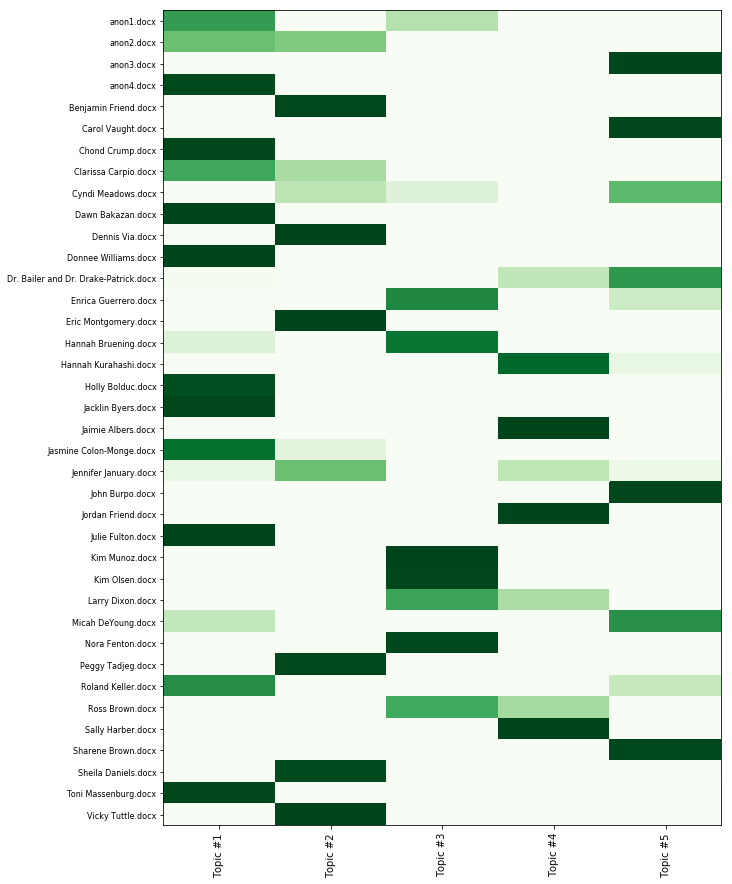

In [140]:
#unordered chart 

#fig = plt.figure(1)
#ax = fig.add_subplot(111)
plt.figure(figsize=(10,15))
plt.pcolor(doc_topic_dists_list, norm=None, cmap='Greens')
plt.yticks(np.arange(doc_topic_dists_list.shape[0])+0.5, docnames)
plt.xticks(np.arange(doc_topic_dists_list.shape[1])+0.5, topic_labels)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.tick_params(axis='y', which='major', labelsize=8)
#plt.colorbar(cmap='Blues')
#plt.tight_layout()  # fixes margins
#plt.show()

#fig = matplotlib.pyplot.gcf()
#plt.set_size_inches(18.5, 10.5, forward=True)
#fig.savefig('test2png.png', dpi=100)

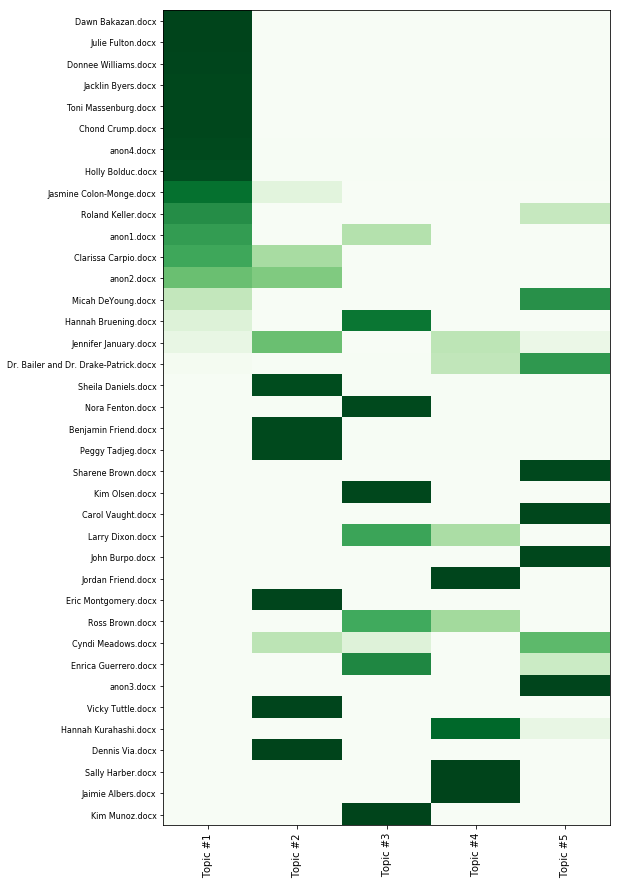

In [147]:
#ordered chart: topic 1 

plt.figure(figsize=(8,15))
plt.pcolor(df_sort0_numpy, norm=None, cmap='Greens')
plt.yticks(np.arange(df_sort0_numpy.shape[0])+0.5, docnames0)
plt.xticks(np.arange(df_sort0_numpy.shape[1])+0.5, topic_labels)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.tick_params(axis='y', which='major', labelsize=8)